# SentimentAnalysis
## K-Means
### [ Opiniones VS Atracciones ]
#### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.

### Importar Librerias

In [1]:
# Librerias DataFrame
import numpy as np
import pandas as pd
import re

In [2]:
# Librerias Graficos e imagenes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import seaborn as sns
from IPython.display import Image

In [3]:
# Importar STOPWORDS
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Vectorizar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to C:\Users\Ruiso Local
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Datos de Clasificacion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
# Exportar data
import pickle

### Leer un archivo XLSX

In [6]:
# Leer el archivo de tipo XLSX
dfData = pd.read_excel("Rest_Mex_2022_Sentiment_Analysis_Track_Train.xlsx")

In [7]:
dfData.head(3)

,Title,Opinion,Polarity,Attraction
0,Pésimo lugar,Piensen dos veces antes de ir a este hotel te ...,1,Hotel
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1,Restaurant
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1,Hotel


In [8]:
dfData.keys()

Index(['Title', 'Opinion', 'Polarity', 'Attraction'], dtype='object')

### Conociendo la Data

<AxesSubplot:xlabel='Attraction'>

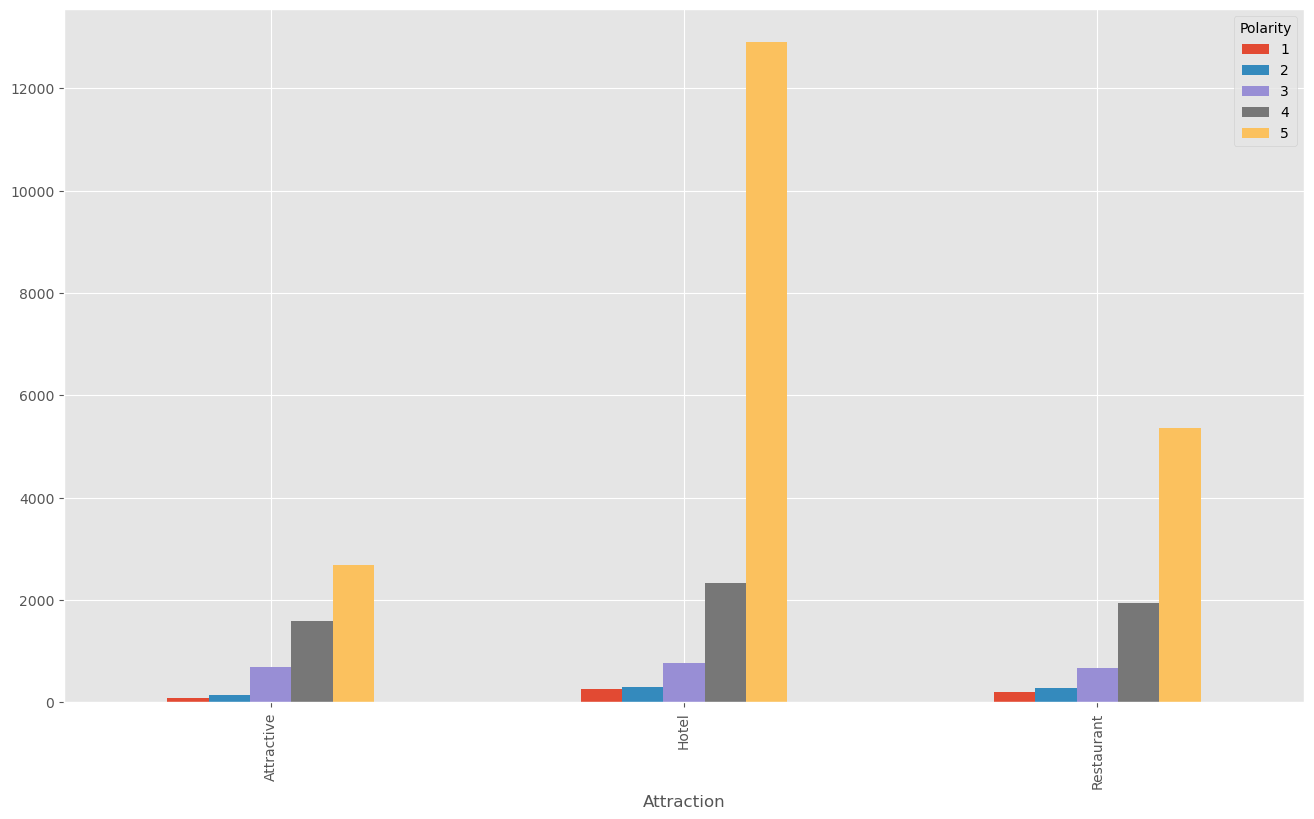

In [9]:
sentiment = dfData.groupby(['Attraction',
                            'Polarity']).Polarity.count().unstack()
sentiment.plot(kind="bar")

<AxesSubplot:ylabel='Attraction'>

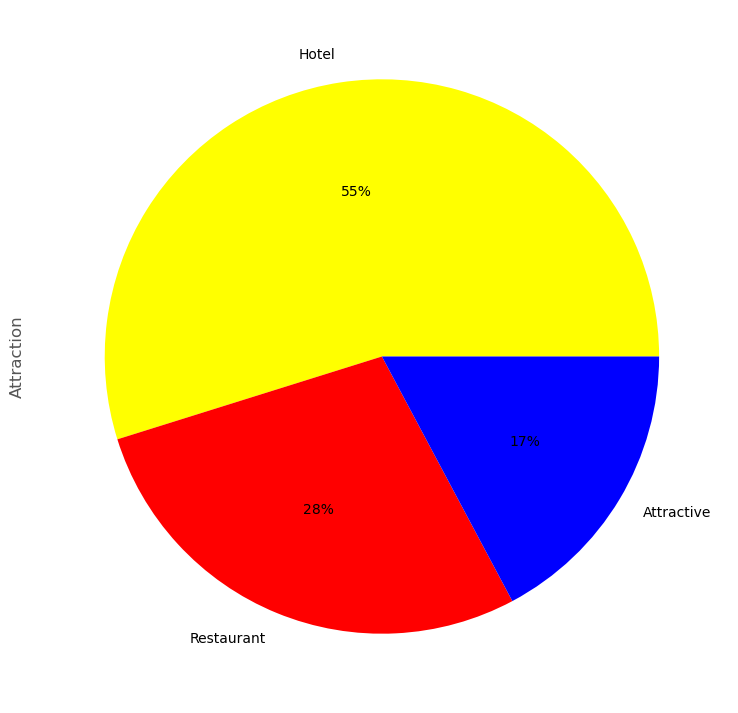

In [10]:
#Grafico de torta ejemplificado la Atraccion
dfData.Attraction.value_counts().plot(kind="pie", 
                                             autopct="%1.0f%%", 
                                             colors=["yellow",
                                                     "red",
                                                     "blue"])

<AxesSubplot:ylabel='Polarity'>

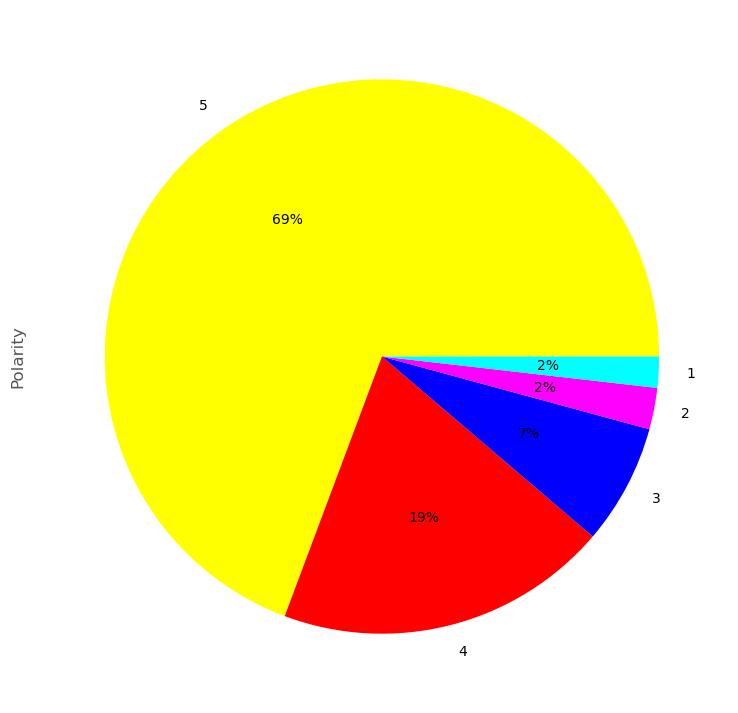

In [11]:
#Grafico de torta ejemplificado la Polaridad
dfData.Polarity.value_counts().plot(kind="pie", 
                                             autopct="%1.0f%%", 
                                             colors=["yellow",
                                                     "red",
                                                     "blue",
                                                    "magenta",
                                                    "cyan"])

In [12]:
dfData.keys()

Index(['Title', 'Opinion', 'Polarity', 'Attraction'], dtype='object')

In [13]:
dfData.groupby('Polarity').size()

Polarity
1      547
2      730
3     2121
4     5878
5    20936
dtype: int64

In [14]:
dfData.describe()

,Polarity
count,30212.000000
mean,4.520124
std,0.867334
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
dfData.groupby('Attraction').size()

Attraction
Attractive     5197
Hotel         16565
Restaurant     8450
dtype: int64

### Features y Labels

In [16]:
# [0]       [1]         [2]        [3]
# ['Title', 'Opinion', 'Polarity', 'Attraction']

features = dfData.iloc[:,1].values  # Opinion
labels = dfData.iloc[:,2].values    # Polarity

### Limpiar Dataset

In [17]:
# Limpiar el dataset de todos los caracteres especiales.
processed_features = []

for sentence in range(0, len(features)):
    #Remove all the special characters
    processed_feature = re.sub(r'\W',' ', str(features[sentence]))
    #remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    #remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    #substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    #removing prefixxed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    #converting to lowercase
    processed_feature = processed_feature.lower()
    #añadirlo al arreglo alv
    processed_features.append(processed_feature)

In [18]:
# En el anterior paso tenemos nuestra nueva 
# columna de features (Opiniones)

In [19]:
vectorizer = TfidfVectorizer (max_features=2500, 
                              min_df = 7, 
                              max_df=0.8, 
                              stop_words=stopwords.words('spanish'))

In [20]:
processed_features = vectorizer.fit_transform(processed_features).toarray()

### Definir Valores de Entrada

In [25]:
X = processed_features

In [22]:
y = labels

In [23]:
X.shape

(30212, 2500)

In [24]:
y.shape

(30212,)

Averiguemos cual es el valor "K"

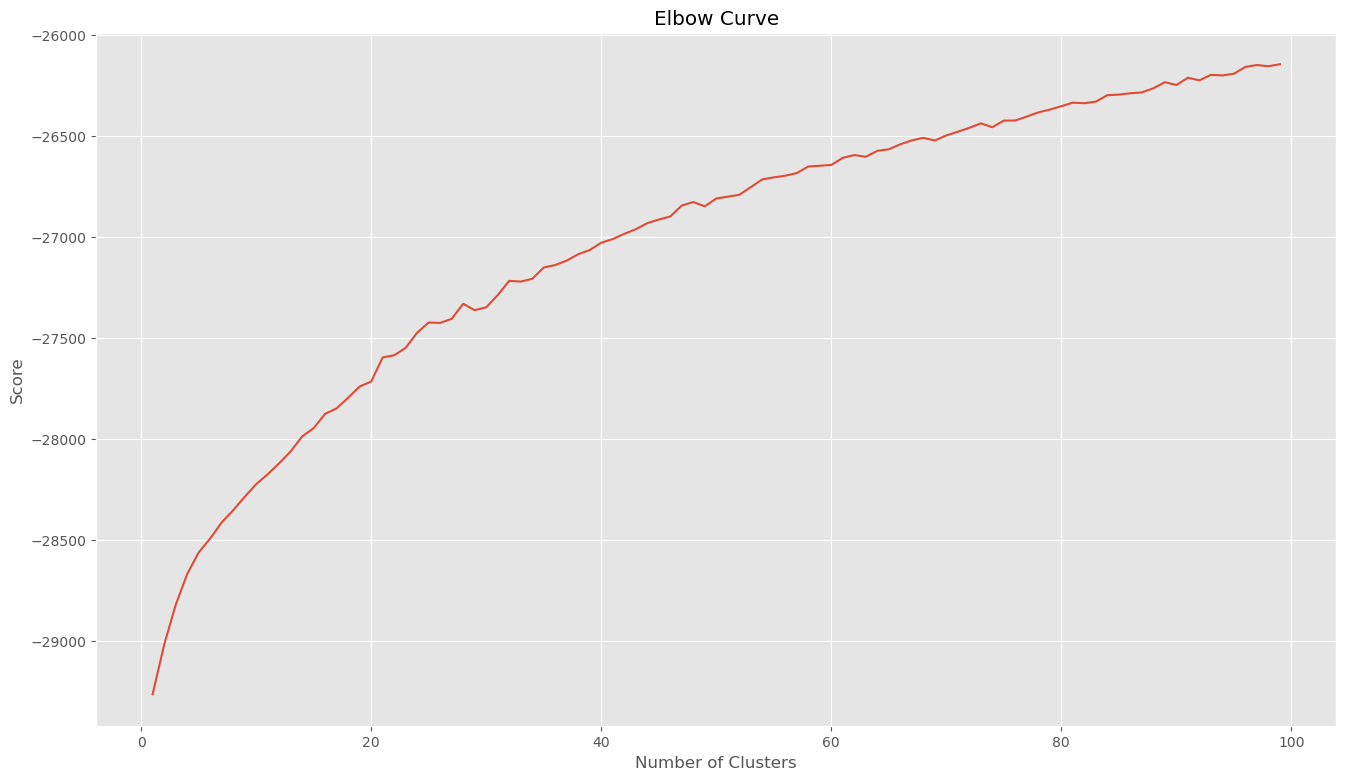

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

Nc = range(1, 100)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Con el primer rango aun no puedo ver el numero de "K" con facilidad, por lo que aumento el rango y guardo los valores que llevo al momento

In [32]:
old_score = score

In [34]:
old_NC = Nc

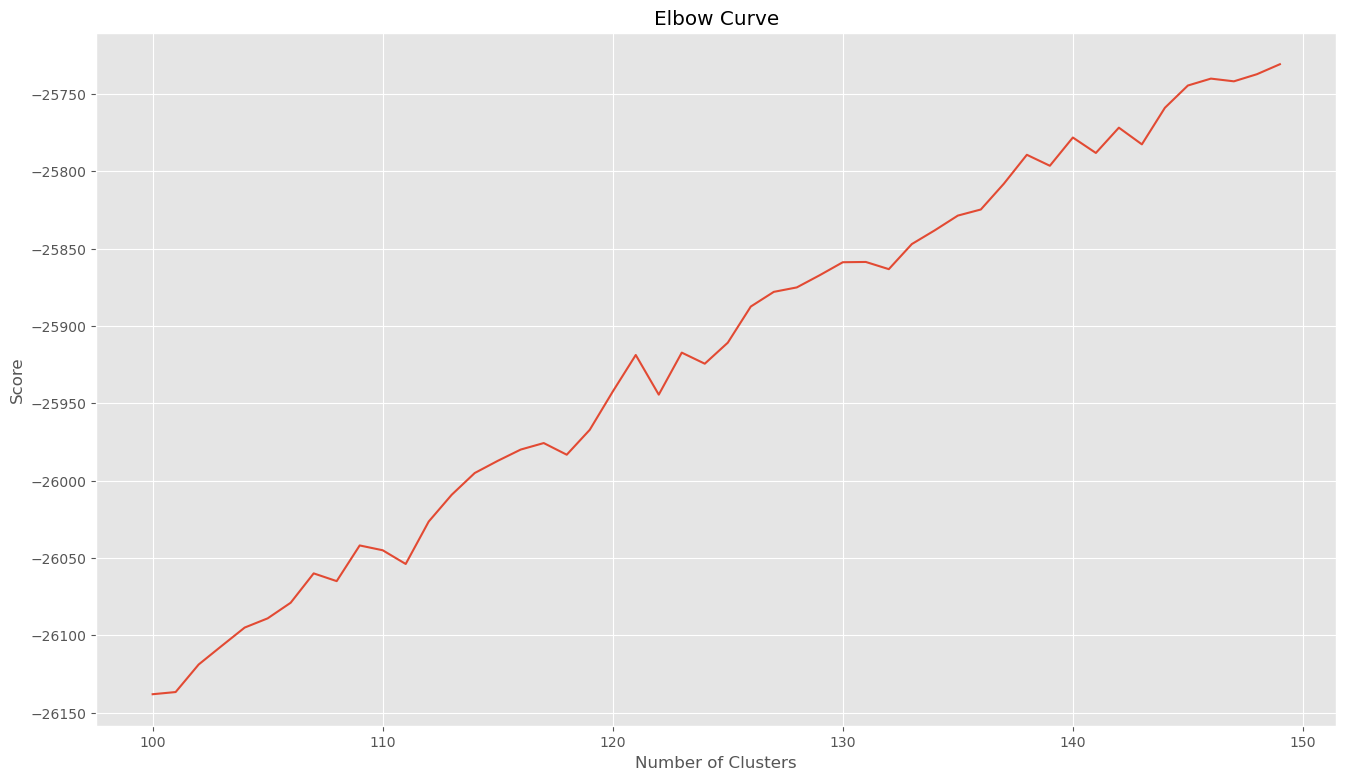

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

Nc = range(100, 150)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La varianza de datos ya es minima entre la ultima y penultima grafica por lo que puedo establecer un K = 100 o 150 segun a consideracion.

In [36]:
k = 150

basado en la guia:
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

un k aceptable fue con un score en -5000 ...

si 

0 --> -29000

40 --> -27000

100 --> -26000

150 --> -25750

.
.
.

por intuicion quiza 

.
.
.

1000 --> -5000

comprobemos

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

Nc = range(800, 1020)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

KeyboardInterrupt: 

Este proceso ya va mas de 22:21:44h >:"v   

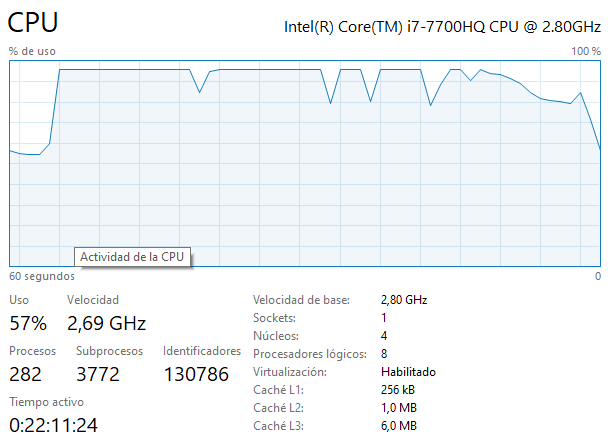

In [51]:
Image("rendimiento.png")

In [ ]:
K = 

### K-means Clustering

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [38]:
import random 
semilla = random.randint(0,100)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state=semilla,
                                                    stratify=y)

In [46]:
print(semilla)

64


In [40]:
import warnings; warnings.simplefilter('ignore')

In [41]:
from sklearn.cluster import KMeans

In [44]:
modelo = KMeans(n_clusters=k)

In [45]:
modelo.fit(X_train, y_train)

KMeans(n_clusters=150)

In [48]:
centroids = modelo.cluster_centers_
print(centroids)

[[ 0.00000000e+00  8.67361738e-19  5.01157554e-03 ...  0.00000000e+00
   3.25260652e-19  0.00000000e+00]
 [ 4.07472279e-03  5.31455125e-03  8.19023683e-04 ...  5.04960236e-03
   4.34046207e-04  7.18537808e-04]
 [ 0.00000000e+00  5.64618802e-03  1.00628812e-02 ...  0.00000000e+00
   2.16840434e-19 -5.42101086e-20]
 ...
 [ 2.82232829e-03  6.34933859e-03 -8.67361738e-19 ...  8.59251019e-03
   0.00000000e+00  1.53486498e-03]
 [ 3.27343329e-03  7.16599924e-03  9.56270637e-03 ...  5.40423758e-03
  -2.16840434e-19 -5.42101086e-20]
 [ 6.16954518e-03  1.00938916e-02  2.85059358e-03 ...  4.51155897e-03
   1.08420217e-19  0.00000000e+00]]


In [49]:
print(modelo.score(X_test, y_test))

-5211.442960980901


In [ ]:
Entrenando con sueño alv >:v

### 5 polaridades 5 clusters

In [ ]:
modelo = KMeans(n_clusters=5)
modelo.fit(X_train, y_train)
centroids = modelo.cluster_centers_
print(centroids)

In [29]:
kmeans = MiniBatchKMeans(150)

In [30]:
clf = kmeans.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(clf.score(X_test, y_test))

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### Prediciendo

In [40]:
print(clf.score(X_test, y_test))

-5772.552246638455


In [34]:
predictions = (clf.predict(X_test))

In [35]:
print(confusion_matrix(y_test, predictions))

ValueError: Mix of label input types (string and number)

In [36]:
print(classification_report(y_test, predictions))

ValueError: Mix of label input types (string and number)

In [37]:
print(accuracy_score(y_test, predictions))

0.0
